#### Developing Deep Learning Flower Image Classifcation Algorithm

###### Objective:
Build a DL algorithm to classify the flower images. 

###### Description:
The flower data set from keras inbuild dataset repository is taken for the analysis. It contains 5 different categories of flowers.

###### Data Augmentation is applied to overcome "overfitting in the training data"



In [1]:
#importing Necessary Libraries
import numpy as np
import cv2
import os
import PIL 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', cache_dir='.', origin=dataset_url, untar=True)

In [3]:
import pathlib

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
img_cnt = len(list(data_dir.glob("*/*.jpg")))


In [7]:
tulips = list(data_dir.glob("tulips/*"))

In [8]:
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

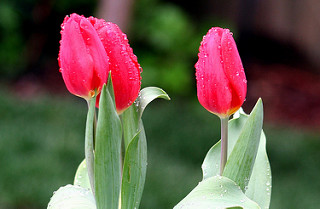

In [9]:
PIL.Image.open(str(tulips[0]))

In [10]:
#creating a class for each category of images
flr_img_dict = {
    'roses':list(data_dir.glob("roses/*")),
    'daisy':list(data_dir.glob("daisy/*")),
    'dandelion':list(data_dir.glob("dandelion/*")),
    'sunflower':list(data_dir.glob("sunflowers/*")),
    'tulips':list(data_dir.glob("tulips/*"))      
}

In [11]:
flr_img_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [12]:
flr_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflower':3,
    'tulips':4
}

In [13]:
#Reading the image data and storing it in a variable
img = cv2.imread(str(flr_img_dict['roses'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
X,y = [],[]
for flr_name, images in flr_img_dict.items():
    print(flr_name, len(images))

roses 641
daisy 633
dandelion 898
sunflower 699
tulips 799


In [ ]:
for flr_name, images in flr_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        res_img = cv2.resize(img, (180,180))
        X.append(res_img)
        y.append(flr_label_dict[flr_name])
        

In [ ]:
y[1000:1010]

In [ ]:
#Variable contains all the images as an 3 dimensional array
len(X)

In [ ]:
#Converting the images into numpy array for convenience
X= np.array(X)
y= np.array(y)

In [ ]:
X

###### Model Building


In [ ]:
#Splitting the data into train and test data sets.
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=34)

In [ ]:
len(X_train), len(X_test)

In [ ]:
#Normalising the intensity of the images
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

In [ ]:
#Now the intensities are normalised.
#Building a Baseline model:

In [ ]:
model = Sequential([
    
    layers.Conv2D(16,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),    
    layers.Conv2D(64,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(5)    
])

model.compile(optimizer='adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy']
             )

model.fit(X_train, y_train, epochs=10)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
#The prediction accuracy is bad in comparison to the training accuracy, 
#clearly shows overfitting on the training data set. 


In [ ]:
pred = model.predict(X_test)
pred

In [ ]:
#Converting the predictions into score
score = tf.nn.softmax(pred[0])
np.argmax(score)

In [ ]:
y_test[0]

In [ ]:
#As we can see the prediction is tulip, but the actual value is rose. 
#This needs to be addressed by data augmentation. 

In [ ]:
score = tf.nn.softmax(pred[10])
np.argmax(score), y_test[10]

In [ ]:
#In this case the prediction and actual values are same. 

In [ ]:
#By doing data augmentation the overfitting can be addressed. 

In [ ]:
img_height = 180
img_width = 180
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3), 
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape=(img_height,
                                                             img_width, 3))
]

)

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))
#Everytime when we run this the rotation and the zoom changes. 

In [ ]:
#Adding more samples into the dataset to generalise the model to avoid overfitting. 

In [ ]:
#Fitting the model with the augmented data. 
model = Sequential([
    data_aug, 
    layers.Conv2D(16,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),    
    layers.Conv2D(64,3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)    
])

model.compile(optimizer='adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy']
             )

model.fit(X_train, y_train, epochs=30)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
#Converting the predictions into score
score = tf.nn.softmax(pred[10])
np.argmax(score), y_test[10]

#### Accuracy on the test data is increased slightly. Because of the limitation in the computer perfomance. Once you increase the number of epochs the accuracy will increase drastically. 